# Montecarlo Approximation of Electron-Matter-Interaction

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
from fastai.vision.all import * 
import fastai
import torch
print("sys.version", sys.version)
print("cuda device name(0)", torch.cuda.get_device_name(0))
print("torch.__version__", torch.__version__)
print("fastai.__version__", fastai.__version__)

sys.version 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
cuda device name(0) Tesla V100S-PCIE-32GB
torch.__version__ 1.7.1
fastai.__version__ 2.5.3


In [3]:
import pathlib
input_path = Path('./data')

def get_x(input_path):
    file_names = get_image_files(input_path)
    file_names = [filename for filename in file_names if "_hf.png" in str( filename ) ]
    return file_names
    
file_names = get_x(input_path)    
print(file_names[0:5])

[Path('data/CoxSpheres_Small_01_230_hf.png'), Path('data/Fibers_01mus_01_140_hf.png'), Path('data/NonOverlappingBalls_01_255_hf.png'), Path('data/NonOverlappingBalls_01_465_hf.png'), Path('data/CoxSpheres_Large_01_20_hf.png')]


## Datensatz laden

In [4]:
def label_function(filename):
    filename_parts = str(filename.stem).split("_")
    y = input_path / Path( "_".join(filename_parts[:-1]) + "_bse.png" )
    return str(y)

for i in range(5):
    print(file_names[i], "=>", label_function(file_names[i]))

data/CoxSpheres_Small_01_230_hf.png => data/CoxSpheres_Small_01_230_bse.png
data/Fibers_01mus_01_140_hf.png => data/Fibers_01mus_01_140_bse.png
data/NonOverlappingBalls_01_255_hf.png => data/NonOverlappingBalls_01_255_bse.png
data/NonOverlappingBalls_01_465_hf.png => data/NonOverlappingBalls_01_465_bse.png
data/CoxSpheres_Large_01_20_hf.png => data/CoxSpheres_Large_01_20_bse.png


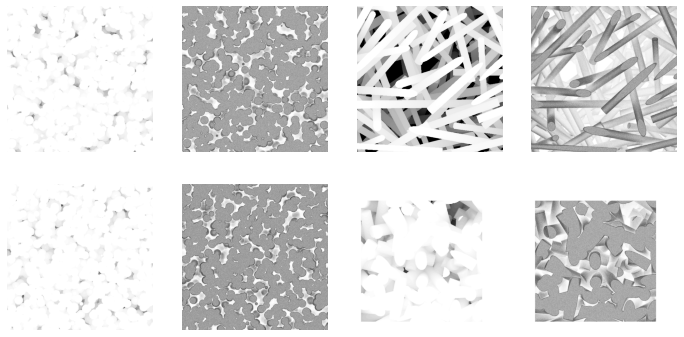

In [5]:
item_transforms  = [RandomCrop((512,512))]

datablocks = DataBlock(blocks=(ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
                       get_items = get_x,
                       get_y = label_function,
                       splitter=RandomSplitter(valid_pct=0.2, seed=42),
                       item_tfms=item_transforms)

data_loader = datablocks.dataloaders(input_path, bs=4, num_workers=0 )

data_loader.show_batch( max_n=4 )

# Netzwerk Architektur

In [6]:
def conv_block( n_in, n_out ):
    return nn.Sequential ( 
        nn.Conv2d(n_in,n_out,3,padding=1), 
        nn.ReLU()
    )

def create_model( nlayer = 6, nfeatures = 32 ):
    layer = [ conv_block(1,nfeatures) ]
    for i in range( nlayer-2):
        layer.append( conv_block(nfeatures,nfeatures) )
    layer.append(conv_block(nfeatures,1))
    model = nn.Sequential ( *layer )
    return model    

## Determine Learning Rate

In [7]:
# learner.save("custom_initial")
# learner.lr_find()

In [8]:
learning_rate=0.001

## Training 

nlayer 16 nfeatues 64 loss l1
model16_64_l1


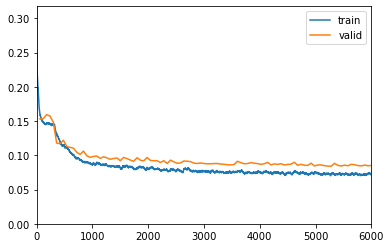

nlayer 16 nfeatues 64 loss l2
model16_64_l2


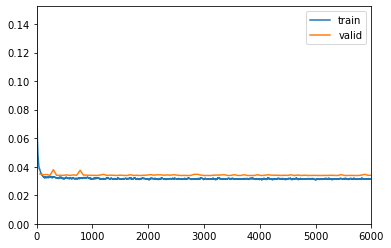

nlayer 16 nfeatues 32 loss l1
model16_32_l1


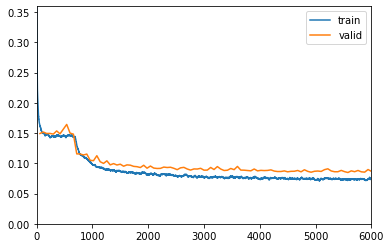

nlayer 16 nfeatues 32 loss l2
model16_32_l2


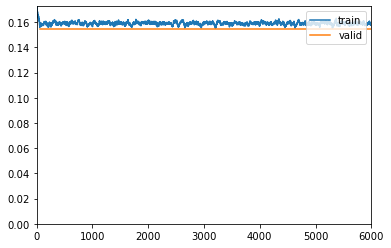

nlayer 16 nfeatues 16 loss l1
model16_16_l1


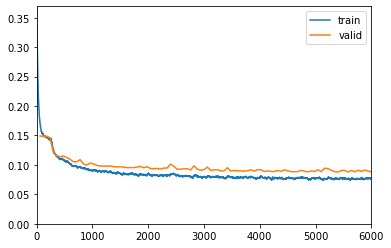

nlayer 16 nfeatues 16 loss l2
model16_16_l2


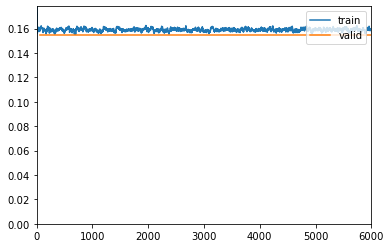

nlayer 16 nfeatues 8 loss l1
model16_8_l1


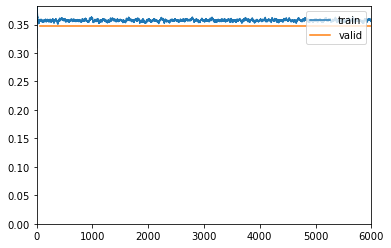

nlayer 16 nfeatues 8 loss l2
model16_8_l2


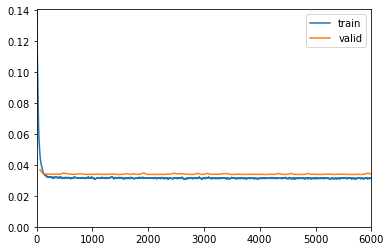

nlayer 8 nfeatues 64 loss l1
model8_64_l1


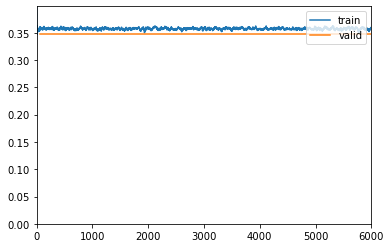

nlayer 8 nfeatues 64 loss l2
model8_64_l2


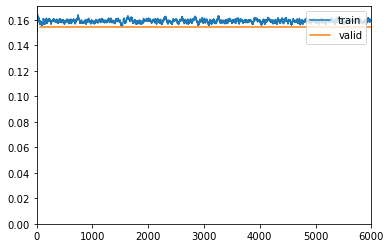

nlayer 8 nfeatues 32 loss l1
model8_32_l1


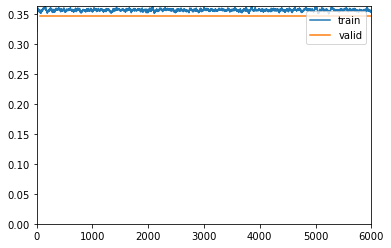

nlayer 8 nfeatues 32 loss l2
model8_32_l2


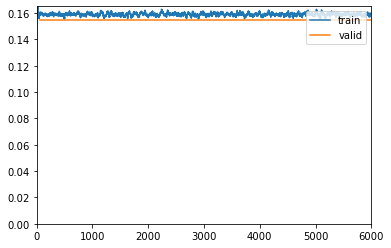

nlayer 8 nfeatues 16 loss l1
model8_16_l1


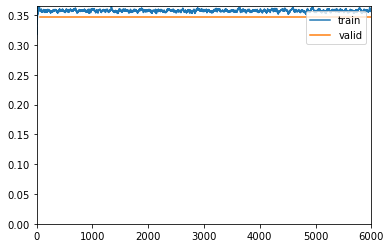

nlayer 8 nfeatues 16 loss l2
model8_16_l2


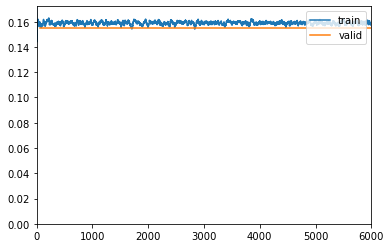

nlayer 8 nfeatues 8 loss l1
model8_8_l1


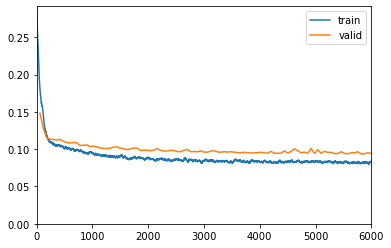

nlayer 8 nfeatues 8 loss l2
model8_8_l2


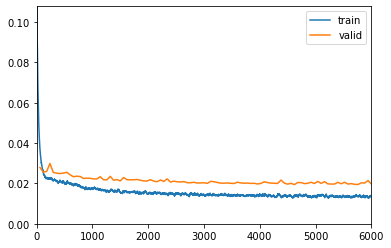

nlayer 4 nfeatues 64 loss l1
model4_64_l1


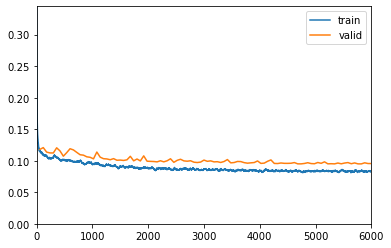

nlayer 4 nfeatues 64 loss l2
model4_64_l2


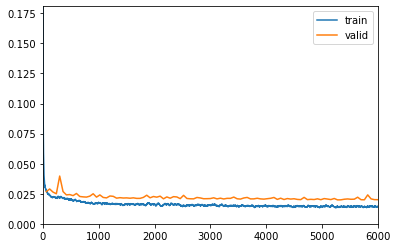

nlayer 4 nfeatues 32 loss l1
model4_32_l1


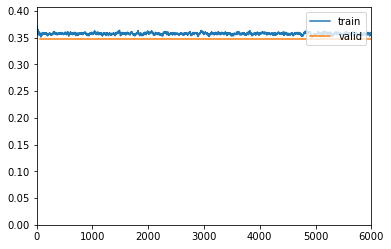

nlayer 4 nfeatues 32 loss l2
model4_32_l2


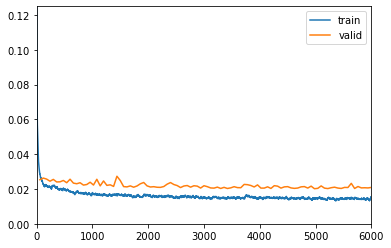

nlayer 4 nfeatues 16 loss l1
model4_16_l1


/home/tida01/anaconda3/envs/jupyter/lib/python3.9/site-packages/fastprogress/fastprogress.py:191: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.graph_fig, self.graph_ax = plt.subplots(1, figsize=figsize)


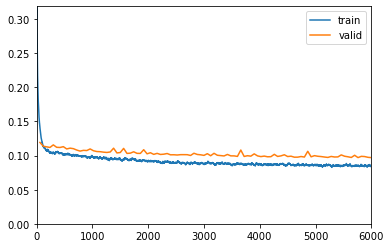

nlayer 4 nfeatues 16 loss l2
model4_16_l2


/home/tida01/anaconda3/envs/jupyter/lib/python3.9/site-packages/fastai/torch_core.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(nrows, ncols, figsize=figsize, **kwargs)


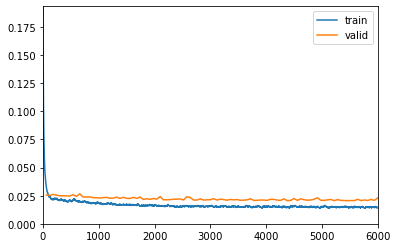

nlayer 4 nfeatues 8 loss l1
model4_8_l1


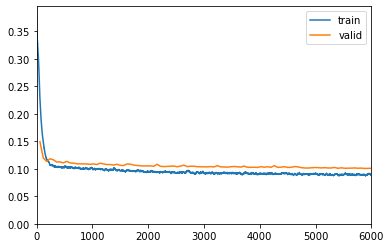

nlayer 4 nfeatues 8 loss l2
model4_8_l2


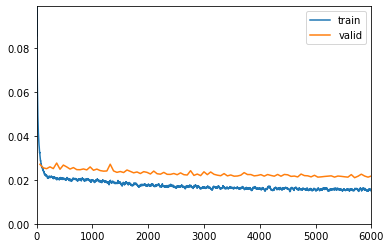

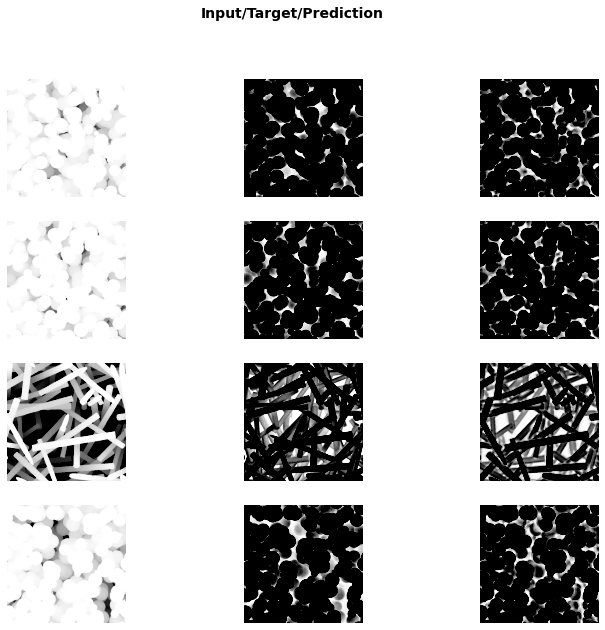

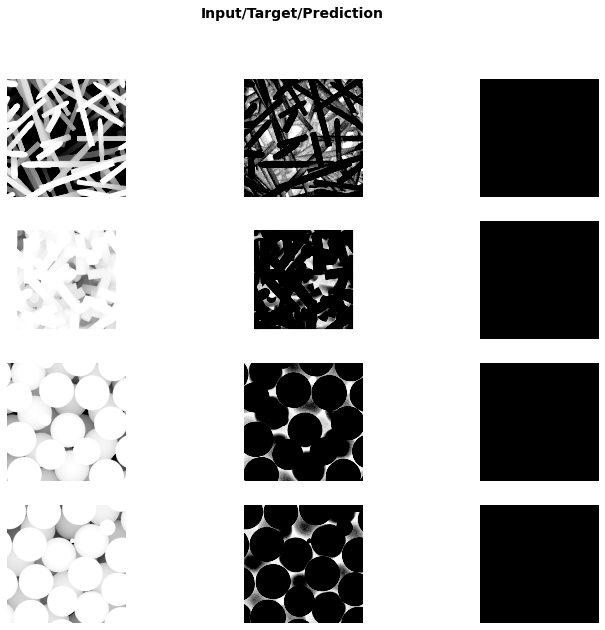

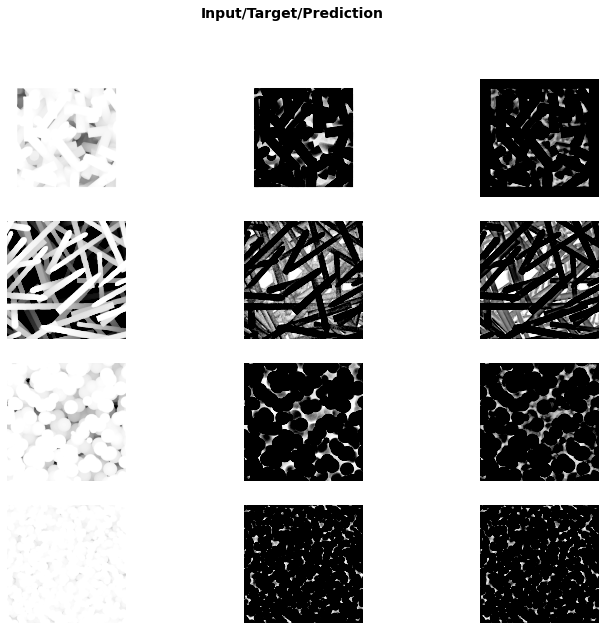

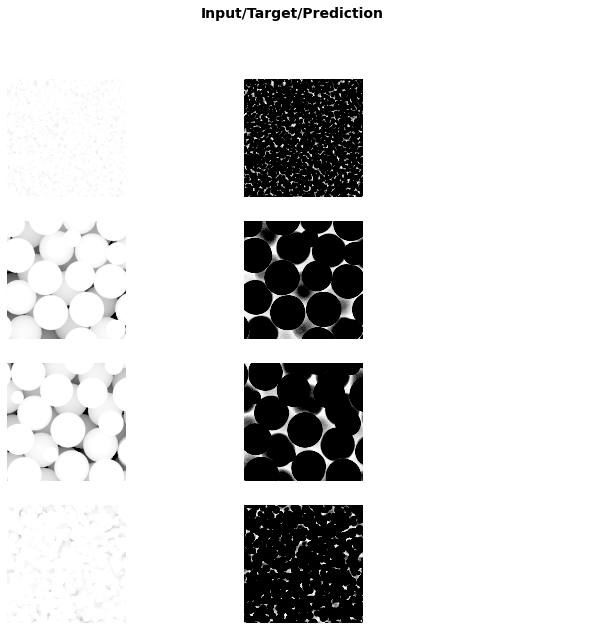

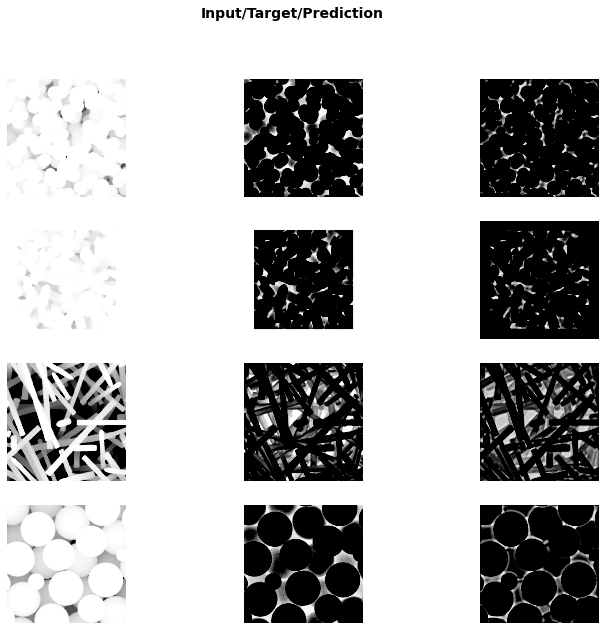

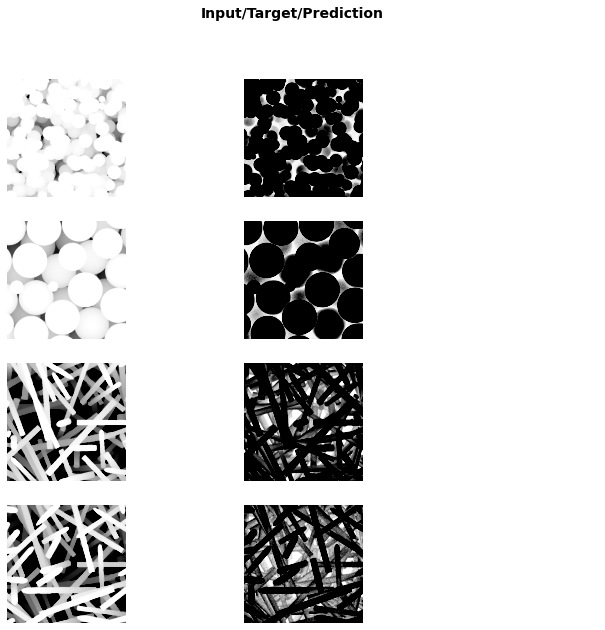

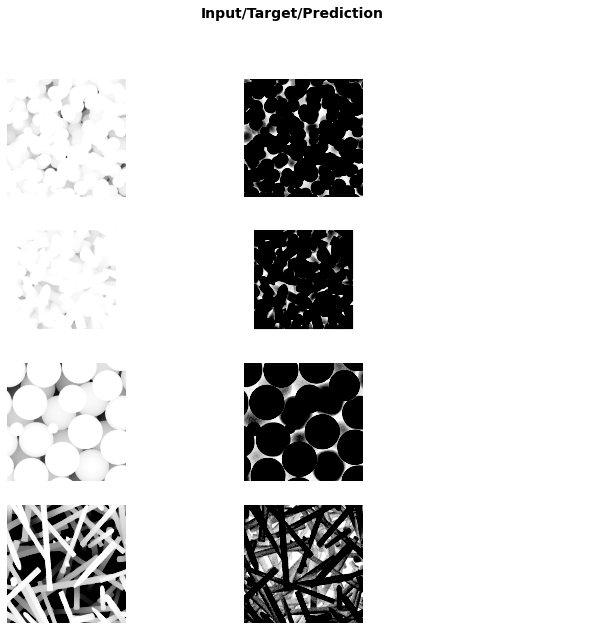

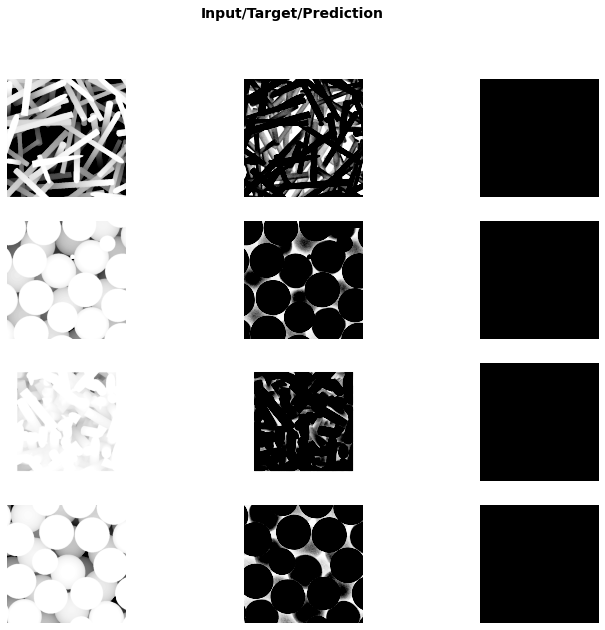

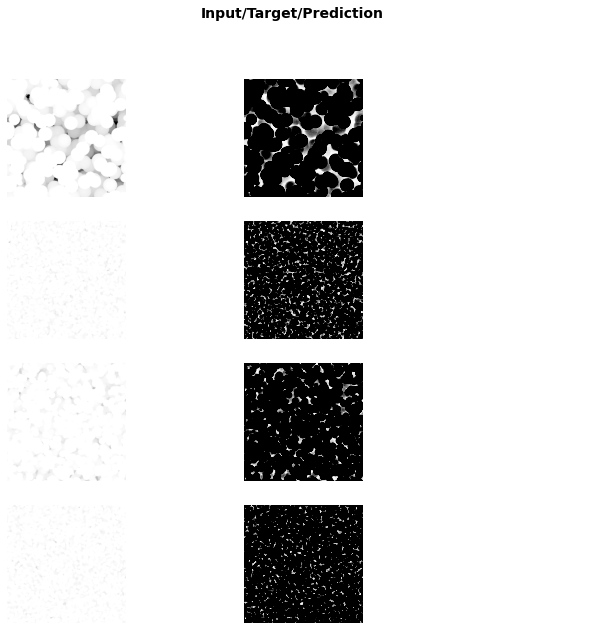

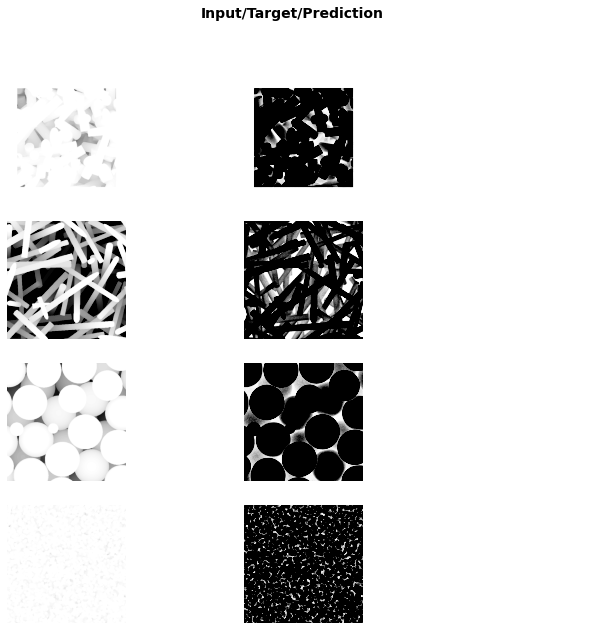

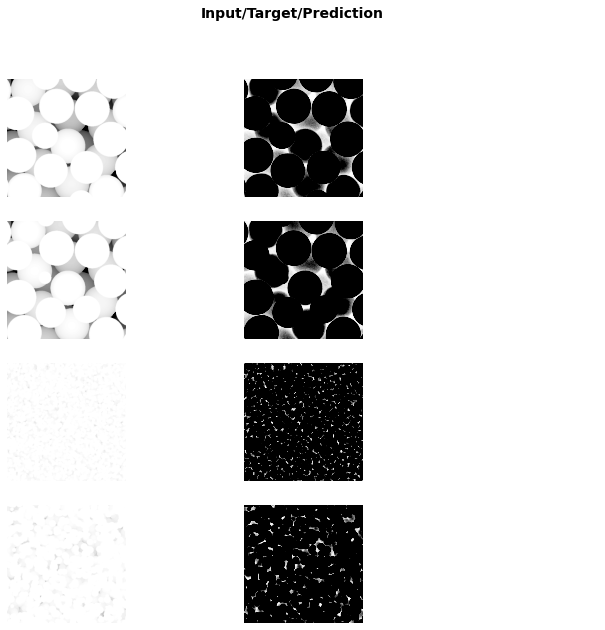

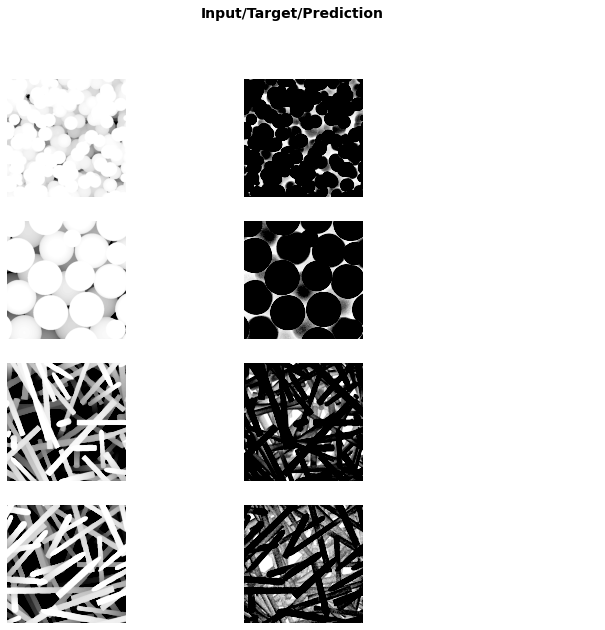

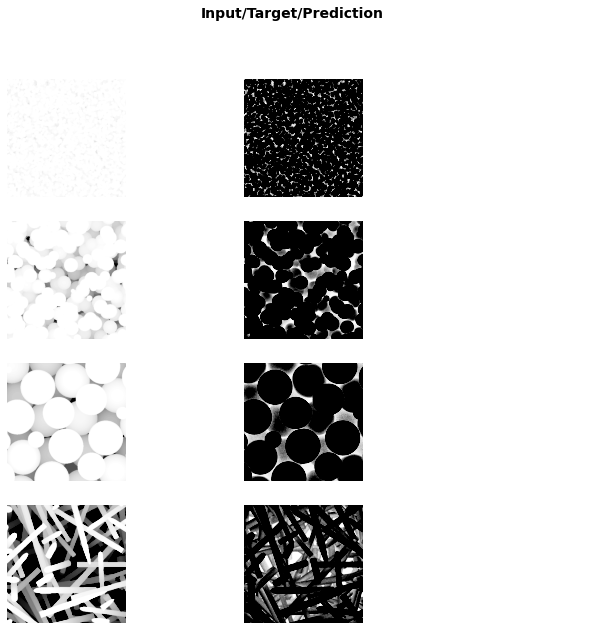

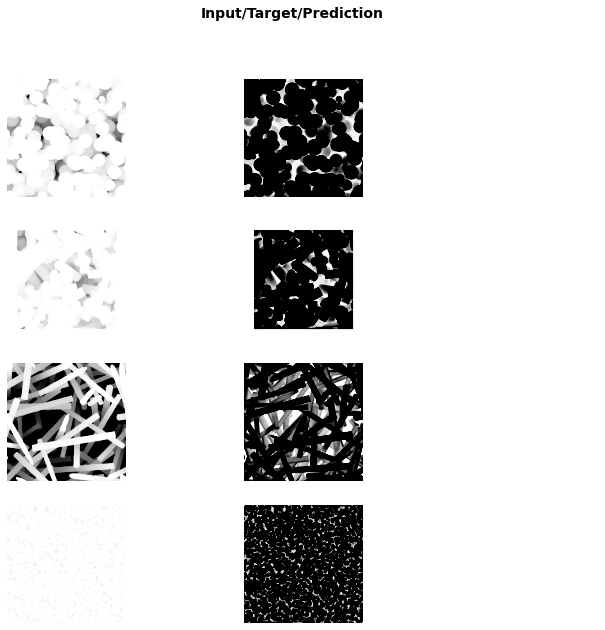

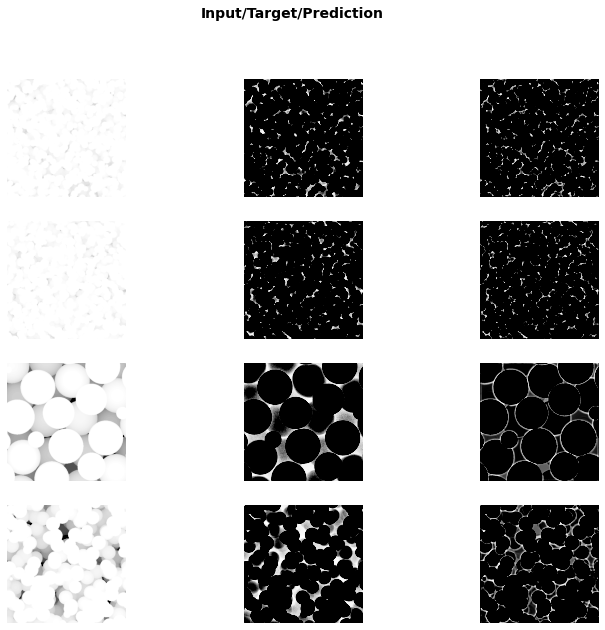

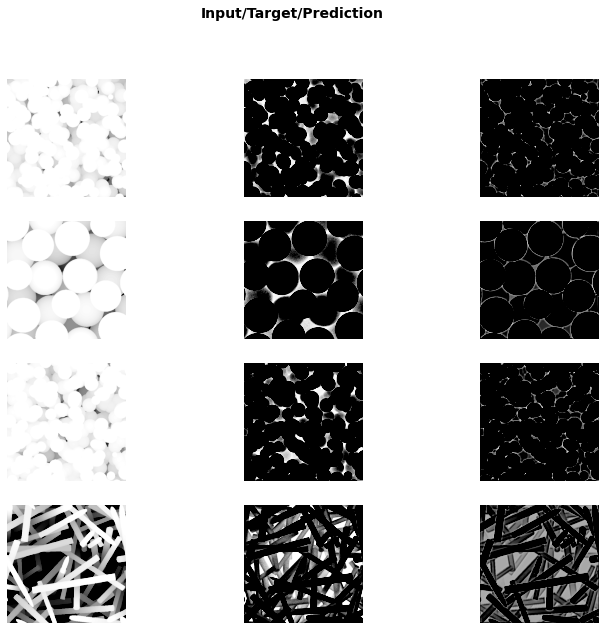

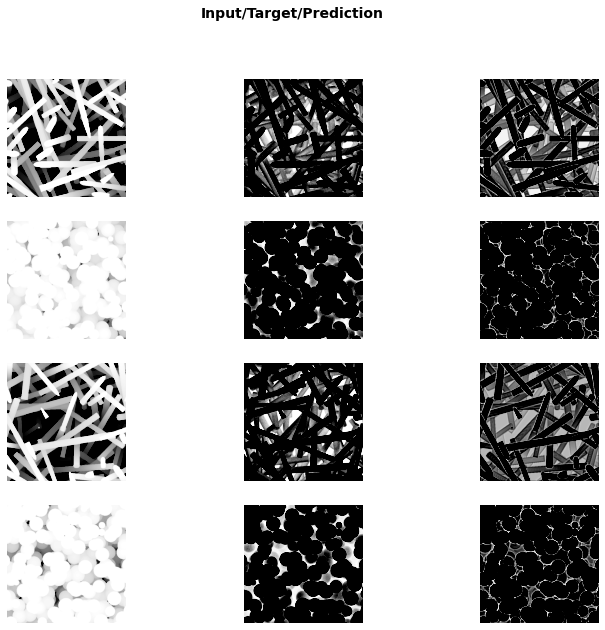

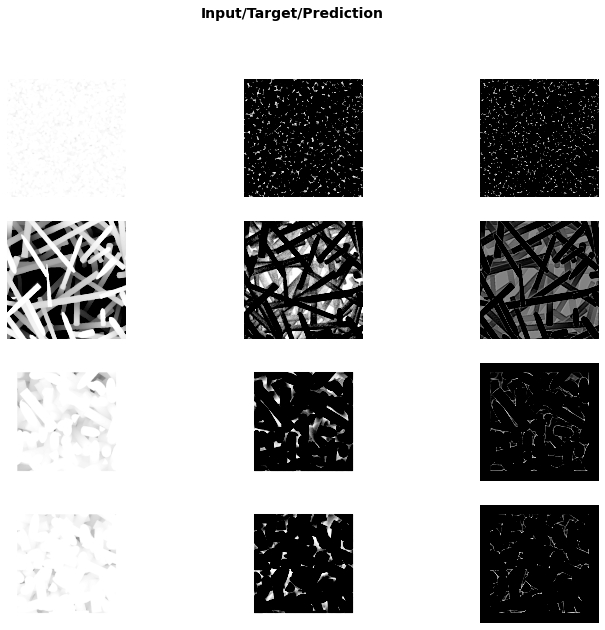

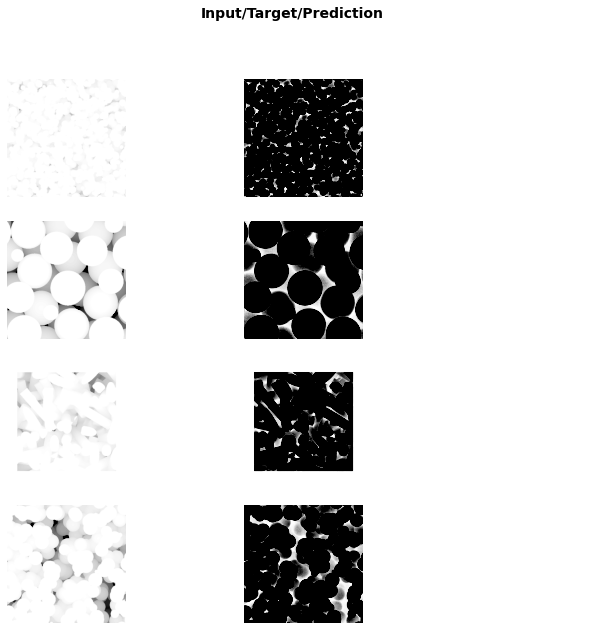

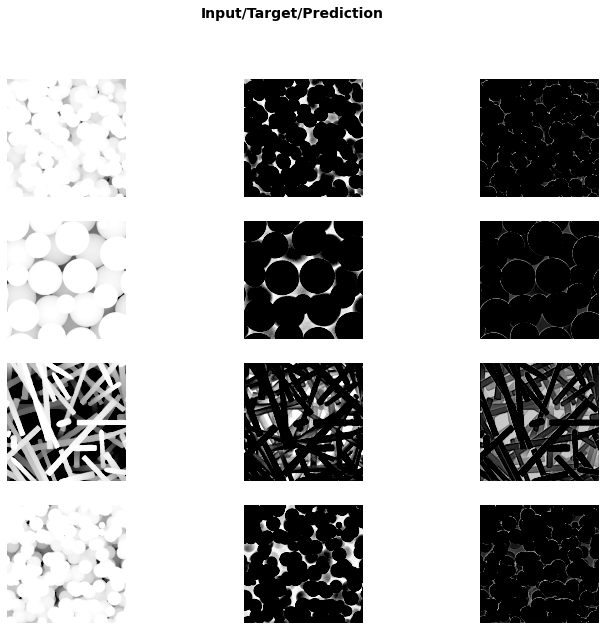

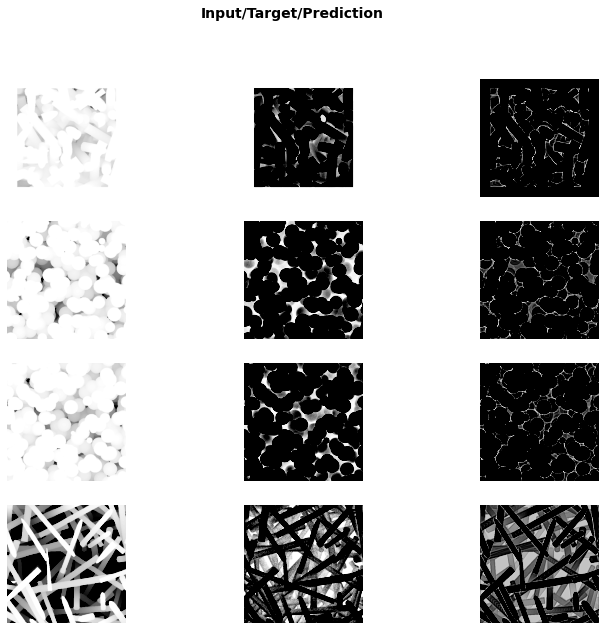

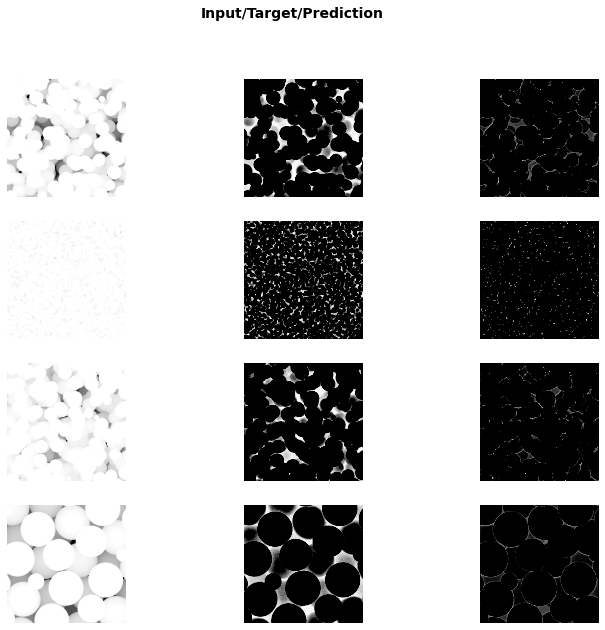

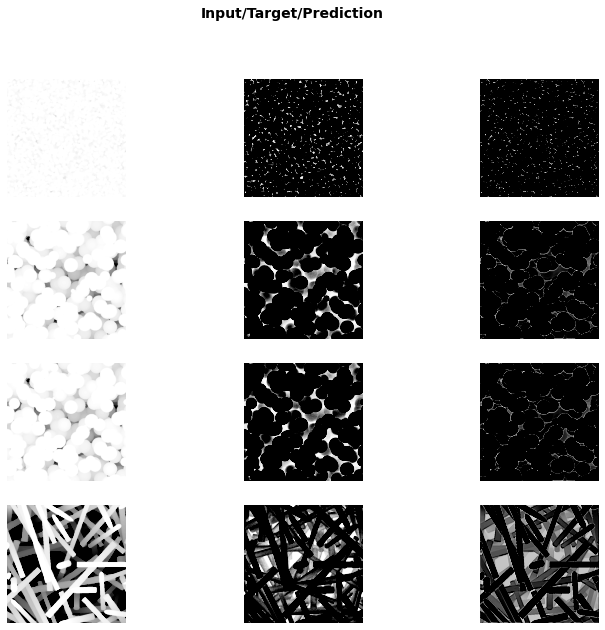

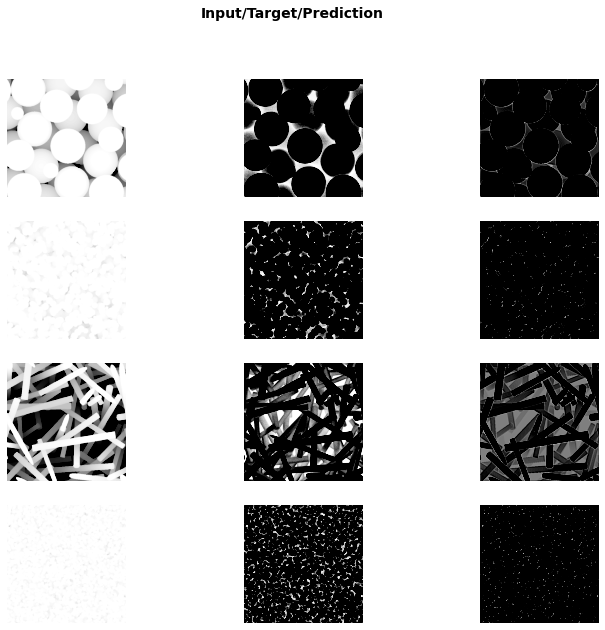

In [9]:
for nlayer in [16,8,4]:
    for nfeatues in [64,32,16,8]:
        for loss,lossname in [ (L1LossFlat(),"l1"), (MSELossFlat(), "l2") ]:
            print("nlayer", nlayer, "nfeatues", nfeatues, "loss", lossname)
            fname = "model" + str(nlayer) + "_" + str(nfeatues) + "_" + str(lossname)
            print(fname)
            model = create_model( nlayer, nfeatues )
            learner = Learner( data_loader, model, loss_func=loss )
            learner.fit( 100, lr=learning_rate, cbs=[ShowGraphCallback()] )
            learner.show_results( figsize=(12,10), vmin=0, vmax=64 )

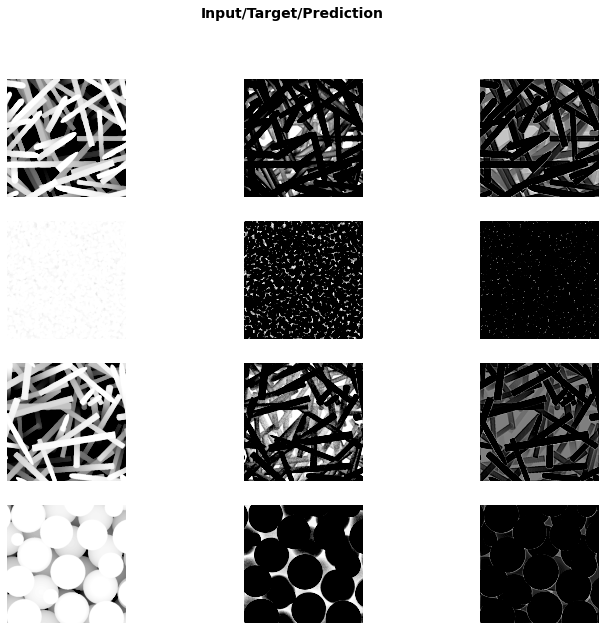

In [10]:
learner.show_results( figsize=(12,10), vmin=0, vmax=64 )